In [1]:
import pandas as pd
import numpy as np
import csv
import json
import pickle
import tqdm

In [87]:
import plotly.express as px
import plotly.graph_objects as go

In [3]:
import  matplotlib.pyplot as plt
from statistics import mean
#結果
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [6]:
#企業リストを取得
company_list = pd.read_csv("../data/new2/df_achieve/company_list.csv",index_col=0)
company_list=company_list.drop(14350)

In [7]:
company_list

,name,class,SettlementDate,end,start
code,,,,,
13010,株式会社極洋,水産・農林業,3月31日,2022年3月期 決算短信〔日本基準〕(連結),平成30年3月期 第1四半期決算短信〔日本基準〕(連結)
13320,日本水産株式会社,水産・農林業,3月31日,2022年３月期 決算短信 〔日本基準〕（連結）,平成30年3月期第1四半期決算短信〔日本基準〕（連結）
13330,マルハニチロ株式会社,水産・農林業,3月31日,2022年３月期 決算短信〔日本基準〕（連結）,平成30年３月期 第１四半期決算短信〔日本基準〕（連結）
13790,ホクト株式会社,水産・農林業,3月31日,2022年３月期 決算短信〔日本基準〕（連結）,平成30年３月期 第１四半期決算短信〔日本基準〕(連結)
13800,株式会社秋川牧園,水産・農林業,3月31日,2022年３月期 決算短信〔日本基準〕（連結）,平成30年３月期 第１四半期決算短信〔日本基準〕（連結）
...,...,...,...,...,...
99930,株式会社ヤマザワ,小売業,2月28日,2022年２月期 決算短信〔日本基準〕（連結）,平成30年２月期 第１四半期決算短信〔日本基準〕（連結）
99940,株式会社やまや,小売業,3月31日,2022年３月期 決算短信〔日本基準〕(連結),平成30年3月期 第1四半期決算短信〔日本基準〕（連結）
99950,株式会社グローセル,卸売業,3月31日,令和４年３月期 決算短信〔日本基準〕(連結),平成30年3月期第1四半期決算短信〔日本基準〕（連結）


In [44]:
# 達成度は1年前の予測値から算出

In [60]:
#達成度
tassei_dic={}
tassei_list=[]
score_dic={}
f_mean_list=[]
j_mean_list=[]
word_mean_list=[]
for i,company in enumerate(company_list.index):
    df_path= '../data/new2/df_achieve/this/{}.csv'.format(company)
    df=pd.read_csv(df_path,index_col=0)   
    tassei=0
    cnt=0
    score_dic[company]=[]
    for i in range(0,len(df)):
        if not "訂正"in df["title"][i]and df["achieve"][i]!="None"and  not "四半期" in df["title"][i]:
            cnt+=1
            score_dic[company].append(df["achieve"][i])
            #achieve.append(float(df["achieve"][i]))
            #date.append(df.index[i])
            if float(df["achieve"][i])>=0:
                tassei+=1
            else:
                tassei-=1
    if cnt!=0:
        tassei_list.append(tassei/cnt)
        tassei_dic[company]=tassei/cnt
        f_mean_list.append((mean(df["f_score"])))
        j_mean_list.append(mean(df["j_score"]))
        word_mean_list.append(mean(df["word_cnt"]))
    #break

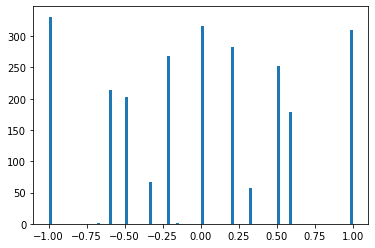

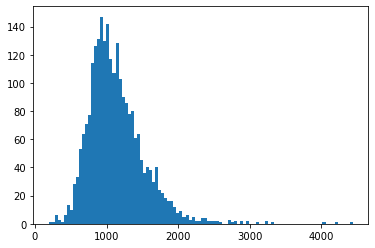

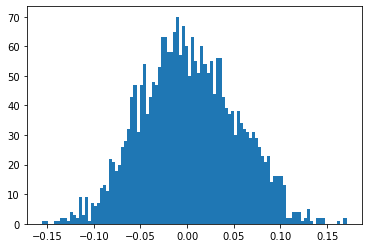

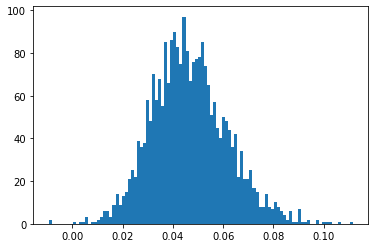

In [61]:
plt.hist(tassei_list, bins=100)
#plt.savefig("image/achieve_per.png")
plt.show()
plt.hist(word_mean_list, bins=100)
#plt.savefig("image/achieve_per.png")
plt.show()
plt.hist(f_mean_list, bins=100)
#plt.savefig("image/achieve_per.png")
plt.show()
plt.hist(j_mean_list, bins=100)
#plt.savefig("image/achieve_per.png")
plt.show()

In [127]:
#四半期込み
achieve=[]
f_list_all=[]
j_list_all=[]
word_list_all=[]
score_dic={}
for i,company in enumerate(company_list.index):
    #if i==10:
   #     break
    df_path= '../data/new2/df_achieve/this/{}.csv'.format(company)
    df=pd.read_csv(df_path,index_col=0)   
    score_dic[company]={"word":0,"f_score":0,"j_score":0,"tassei":0,"achieve":0}
    com_f_list=[]
    com_j_list=[]
    com_word_list=[]
    com_achive_list=[]
    for i in range(0,len(df)):
        if not "訂正" in df["title"][i] and  not "四半期" in df["title"][i] and df["achieve"][i]!="None":
            #if float(df["achieve"][i])>1:
              #  print(company)
                #break
            a=float(df["achieve"][i])
            achieve.append(a)
            f_list_all.append(float(df["f_score"][i]))
            j_list_all.append(float(df["j_score"][i]))
            word_list_all.append(float(df["word_cnt"][i]))
            #平均用
            com_f_list.append(float(df["f_score"][i]))
            com_j_list.append(float(df["j_score"][i]))
            com_word_list.append(float(df["word_cnt"][i]))
            com_achive_list.append(a)
            #date.append(df.index[i])
        elif not "訂正" in df["title"][i] and "四半期" in df["title"][i] and df["achieve"][i]!="None":
            achieve.append(a)
            f_list_all.append(float(df["f_score"][i]))
            j_list_all.append(float(df["j_score"][i]))
            word_list_all.append(float(df["word_cnt"][i]))
            #date_jf.append(df.index[i])
            #平均用
            com_f_list.append(float(df["f_score"][i]))
            com_j_list.append(float(df["j_score"][i]))
            com_word_list.append(float(df["word_cnt"][i]))
            #com_achive_list.append(a)
            
    if company in tassei_dic:
        score_dic[company]["tassei"]=tassei_dic[company]
        score_dic[company]["word"]=mean(com_word_list)
        score_dic[company]["f_score"]=mean(com_f_list)
        score_dic[company]["j_score"]=mean(com_j_list)
        score_dic[company]["achieve"]=mean(com_achive_list)
    else:
        score_dic[company]["tassei"]="None"
    #break

In [149]:
score_dic

{13010: {'word': 1009.95,
  'f_score': -0.03322059970245922,
  'j_score': 0.05032319886823574,
  'tassei': -0.2,
  'achieve': -0.03327010111020896},
 13320: {'word': 1504.35,
  'f_score': -0.019789204222795207,
  'j_score': 0.03279837400676792,
  'tassei': 0.2,
  'achieve': 0.01871589125550712},
 13330: {'word': 1454.375,
  'f_score': -0.0006285004663352492,
  'j_score': 0.04561211489036175,
  'tassei': 1.0,
  'achieve': 0.020888298074209256},
 13790: {'word': 1289.388888888889,
  'f_score': -0.013436174718500723,
  'j_score': 0.04353384655799466,
  'tassei': 0.2,
  'achieve': -0.0008851782797902281},
 13800: {'word': 749.7,
  'f_score': -0.04626380387316196,
  'j_score': 0.044594565924125036,
  'tassei': -0.6,
  'achieve': 0.004127812648017279},
 13810: {'word': 688.75,
  'f_score': -0.0492404587693433,
  'j_score': 0.044455541535801495,
  'tassei': 0.6,
  'achieve': 0.02289936420285124},
 13820: {'word': 1529.25,
  'f_score': 0.06429600974721672,
  'j_score': 0.04062392415392945,
  '

In [120]:
print(mean(f_list_all))
print(mean(j_list_all))
print(mean(word_list_all))

0.0026154105020979417
0.04846608824369218
1144.887077294686


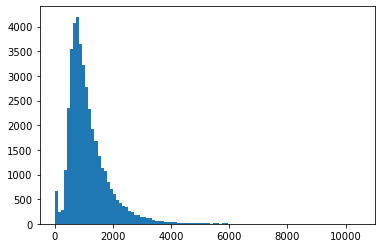

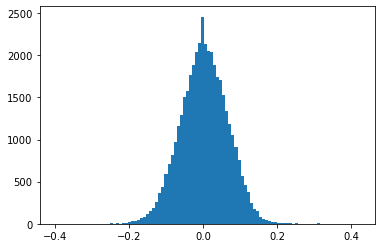

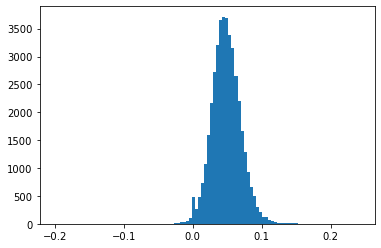

In [122]:
plt.hist(word_list_all, bins=100)
#plt.savefig("image/achieve_per.png")
plt.show()
plt.hist(f_list_all, bins=100)
#plt.savefig("image/achieve_per.png")
plt.show()
plt.hist(j_list_all, bins=100)
#plt.savefig("image/achieve_per.png")
plt.show()

In [136]:
word_tassei_list=[]
j_tassei_list=[]
f_tassei_list=[]
achieve_tassei_list=[]
tassei_com_list=[]
for company in score_dic.keys():
    if score_dic[company]["tassei"] != "None" and str(score_dic[company]["achieve"])!="nan":
        tassei_com_list.append(score_dic[company]["tassei"])
        word_tassei_list.append(score_dic[company]["word"])
        f_tassei_list.append(score_dic[company]["f_score"])
        j_tassei_list.append(score_dic[company]["j_score"])
        achieve_tassei_list.append(score_dic[company]["achieve"])

In [138]:
np.corrcoef([word_tassei_list,f_tassei_list])

array([[1.        , 0.26909085],
       [0.26909085, 1.        ]])

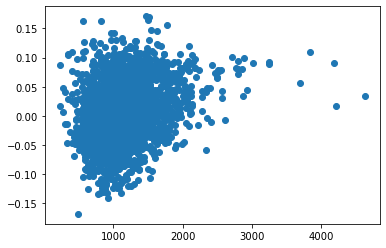

In [147]:
plt.scatter(word_tassei_list,f_tassei_list)

In [139]:
np.corrcoef([word_tassei_list,j_tassei_list])

array([[ 1.        , -0.00605802],
       [-0.00605802,  1.        ]])

In [140]:
np.corrcoef([word_tassei_list,tassei_com_list])

array([[ 1.       , -0.0678139],
       [-0.0678139,  1.       ]])

In [141]:
np.corrcoef([j_tassei_list,tassei_com_list])

array([[1.        , 0.03850556],
       [0.03850556, 1.        ]])

In [142]:
np.corrcoef([f_tassei_list,tassei_com_list])

array([[ 1.        , -0.04533754],
       [-0.04533754,  1.        ]])

In [143]:
np.corrcoef([word_tassei_list,achieve_tassei_list])

array([[ 1.        , -0.08739269],
       [-0.08739269,  1.        ]])

In [144]:
np.corrcoef([f_tassei_list,achieve_tassei_list])

array([[ 1.        , -0.07670388],
       [-0.07670388,  1.        ]])

In [145]:
np.corrcoef([j_tassei_list,achieve_tassei_list])

array([[1.        , 0.00820925],
       [0.00820925, 1.        ]])

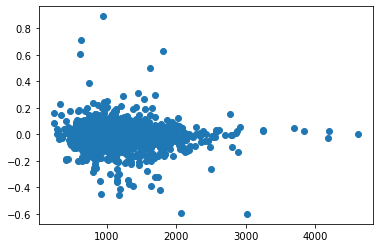

In [148]:
plt.scatter(word_tassei_list,achieve_tassei_list)

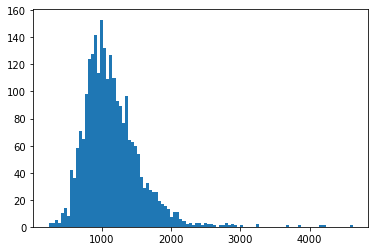

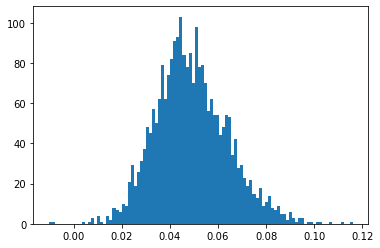

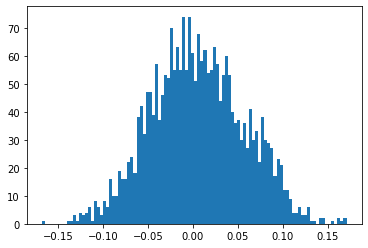

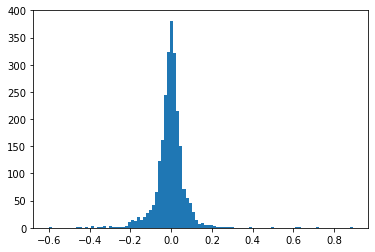

In [146]:
plt.hist(word_tassei_list, bins=100)
#plt.savefig("image/achieve_per.png")
plt.show()
plt.hist(j_tassei_list, bins=100)
#plt.savefig("image/achieve_per.png")
plt.show()
plt.hist(f_tassei_list, bins=100)
#plt.savefig("image/achieve_per.png")
plt.show()
plt.hist(achieve_tassei_list, bins=100)
#plt.savefig("image/achieve_per.png")
plt.show()

# 企業ごとの達成数

In [9]:
#四半期込み
achieve=[]
f_list_all=[]
j_list_all=[]
a=0
for i,company in enumerate(company_list.index):
    #if i==10:
   #     break
    df_path= '../data/new2/df_achieve/this/{}.csv'.format(company)
    df=pd.read_csv(df_path,index_col=0)   
    
    for i in range(0,len(df)):
        if not "訂正" in df["title"][i] and  not "四半期" in df["title"][i] and df["achieve"][i]!="None":
            if float(df["achieve"][i])>1:
                print(company)
                break
            
            a=float(df["achieve"][i])
            achieve.append(a)
            f_list_all.append(float(df["f_score"][i]))
            j_list_all.append(float(df["j_score"][i]))
            
            #date.append(df.index[i])
        elif not "訂正" in df["title"][i] and "四半期" in df["title"][i] and df["achieve"][i]!="None":
            achieve.append(a)
            f_list_all.append(float(df["f_score"][i]))
            j_list_all.append(float(df["j_score"][i]))
            #date_jf.append(df.index[i])

18790
29010
29290
29310
37500
37720
37760
38560
45720
88360


In [36]:
achieve=achieve[3:]
for i in range(0,3):
    achieve.append(achieve[-1])

In [173]:
company=18790
df_path= '../data/new2/df_achieve/this/{}.csv'.format(company)
df=pd.read_csv(df_path,index_col=0)   
achieve_list=[]
date=[]
    if  not "訂正" in df["title"][i] and  not "四半期" in df["title"][i] and df["achieve"][i]!="None":
        achieve.append(float(df["achieve"][i]))
        date.append(df.index[i])

plot_list1=[]
plot_list1.append(go.Scatter(x=date,y=achieve , name=str(company)+"達成度",line={"width": 1}))
plot_list1.append(go.Scatter(x=list(df.index),y=list(df["j_score"]), name=str(company)+"日本語",line={"width": 1}))
plot_list1.append(go.Scatter(x=list(df.index),y=list(df["f_score"]) ,name=str(company)+"金融辞書", line={"width": 1}))

#go.Figure(plot_list1).show()

In [174]:
df

,uriage,pred,achieve,f_score,j_score,word_cnt,pdf_code,title,tuki_pred
2017-08-09,16663,93500.0,-0.8217860962566845,-0.098039,0.036765,408,20170807450035,平成30年3月期 第1四半期決算短信〔日本基準〕（連結）,93500.0
2017-11-09,34855,93500.0,-0.6272192513368984,-0.121287,0.034653,404,20171107411130,平成30年3月期 第2四半期決算短信〔日本基準〕（連結）,93500.0
2018-02-08,62235,93500.0,-0.33438502673796794,-0.110577,0.038462,416,20180206464750,平成30年3月期 第3四半期決算短信〔日本基準〕（連結）,93500.0
2018-05-10,95340,103000.0,-0.07436893203883495,-0.082294,0.017456,1203,20180509430821,平成30年3月期 決算短信〔日本基準〕（連結）,103000.0
2018-08-09,17323,103000.0,-0.8318155339805825,-0.124051,0.025316,395,20180807492908,平成31年3月期 第1四半期決算短信〔日本基準〕（連結）,103000.0
2018-11-14,42203,103000.0,-0.5902621359223301,-0.125320,0.030691,391,20181112435349,平成31年3月期 第2四半期決算短信〔日本基準〕（連結）,103000.0
2019-02-08,65833,103000.0,-0.36084466019417477,-0.096386,0.033735,415,20190205470213,平成31年3月期 第3四半期決算短信〔日本基準〕（連結）,103000.0
2019-05-14,103250,110000.0,-0.06136363636363636,-0.072174,0.025217,1150,20190511422345,2019年3月期決算短信〔日本基準〕（連結）,110000.0
2019-08-09,16678,110000.0,-0.8483818181818182,-0.123487,0.033898,413,20190807483792,2020年3月期 第1四半期決算短信〔日本基準〕（連結）,110000.0
2019-11-14,49164,110000.0,-0.5530545454545455,-0.120988,0.029630,405,20191112425164,2020年3月期 第2四半期決算短信〔日本基準〕（連結）,110000.0


In [179]:
achieve=achieve[3:]
for i in range(0,3):
    achieve.append(achieve[-1])

In [180]:
achieve

[-0.0457565543071161,
 -0.0457565543071161,
 -0.0457565543071161,
 -0.0457565543071161,
 -0.1043671328671328,
 -0.1043671328671328,
 -0.1043671328671328,
 -0.1043671328671328,
 -0.0277074074074074,
 -0.0277074074074074,
 -0.0277074074074074,
 -0.0277074074074074,
 -0.003212,
 -0.003212,
 -0.003212,
 -0.003212,
 -0.0779090909090909,
 -0.0779090909090909,
 -0.0779090909090909,
 -0.0779090909090909,
 -0.0214785100286532,
 -0.0214785100286532,
 -0.0214785100286532,
 -0.0214785100286532,
 0.0029732394366197,
 0.0029732394366197,
 0.0029732394366197,
 0.0029732394366197,
 0.0298746268656716,
 0.0298746268656716,
 0.0298746268656716,
 0.0298746268656716,
 0.0225716510903426,
 0.0225716510903426,
 0.0225716510903426,
 0.0225716510903426,
 -0.0365527777777777,
 -0.0365527777777777,
 -0.0365527777777777,
 -0.0365527777777777,
 -0.0012826086956521739,
 -0.0012826086956521739,
 -0.0012826086956521739,
 -0.0012826086956521739,
 -0.018651063829787234,
 -0.018651063829787234,
 -0.018651063829787234,


In [181]:
len(achieve)

41298

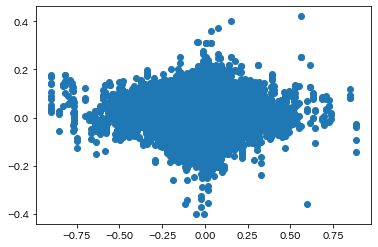

In [38]:
plt.scatter(achieve,f_list_all)
#plt.savefig("image/Fco.png")
plt.show()

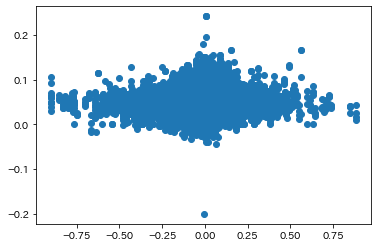

In [345]:
plt.scatter(achieve,j_list_all)
#plt.savefig("image/Fco.png")
plt.show()

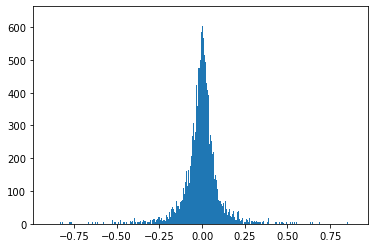

In [78]:
plt.hist(achieve, bins=1000)
plt.savefig("image/achieve_hist.png")
plt.show()

In [194]:
achieve_list

[0,
 0,
 0,
 -0.0457565543071161,
 -0.0457565543071161,
 -0.0457565543071161,
 -0.0457565543071161,
 -0.1043671328671328,
 -0.1043671328671328,
 -0.1043671328671328,
 -0.1043671328671328,
 -0.0277074074074074,
 -0.0277074074074074,
 -0.0277074074074074,
 -0.0277074074074074,
 -0.003212,
 -0.003212,
 -0.003212,
 -0.003212,
 -0.0779090909090909,
 -0.0779090909090909,
 -0.0779090909090909,
 -0.0779090909090909,
 -0.0214785100286532,
 -0.0214785100286532,
 -0.0214785100286532,
 -0.0214785100286532,
 0.0029732394366197,
 0.0029732394366197,
 0.0029732394366197,
 0.0029732394366197,
 0.0298746268656716,
 0.0298746268656716,
 0.0298746268656716,
 0.0298746268656716,
 0.0225716510903426,
 0.0225716510903426,
 0.0225716510903426,
 0.0225716510903426,
 -0.0365527777777777,
 -0.0365527777777777,
 -0.0365527777777777,
 -0.0365527777777777,
 -0.0012826086956521739,
 -0.0012826086956521739,
 -0.0012826086956521739,
 -0.0012826086956521739,
 -0.018651063829787234,
 -0.018651063829787234,
 -0.01865106

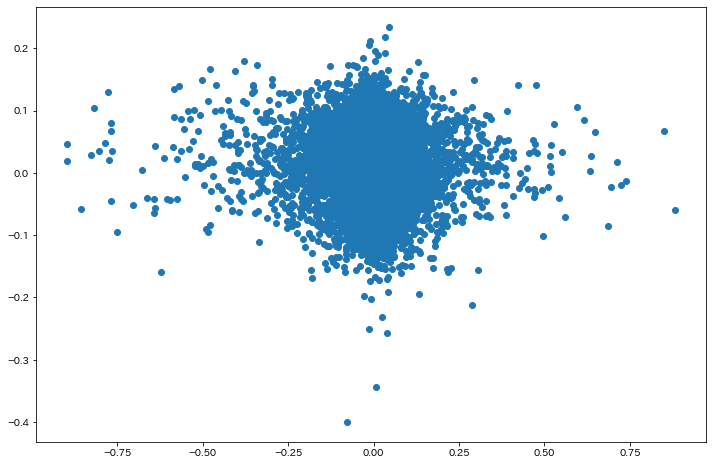

In [34]:
fig = plt.figure(figsize=(12, 8)) #...1
plt.scatter(achieve,f_list_all)
plt.show()

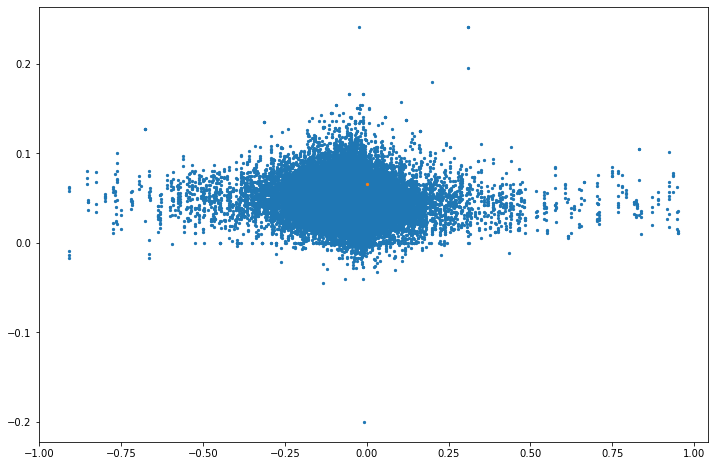

In [193]:
fig = plt.figure(figsize=(12, 8)) #...1
#fig=plt.figure()
#plt.ion()
plt.scatter(achieve,j_list_all,s=5)
plt.scatter(achieve_list[0],j_list[0],s=5)

0it [00:00, ?it/s]

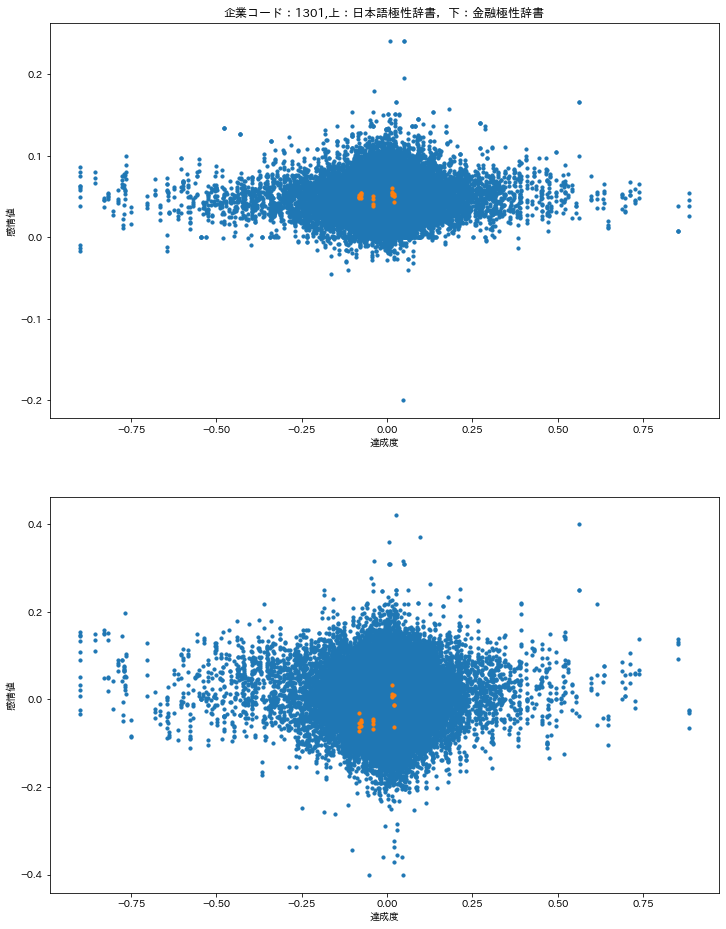

0it [00:00, ?it/s]


In [20]:
achieve_list=[]
f_list=[]
j_list=[]
a=0
for i,company in tqdm.tqdm(enumerate(company_list.index)):
    #print(i)
    #if i==10:
   #     break
    df_path= '../data/new2/df_achieve/this/{}.csv'.format(company)
    df=pd.read_csv(df_path,index_col=0)   
    achieve_list=[]
    f_list=[]
    j_list=[]
    a=float(0)
    for i in range(0,len(df)):
        if not "訂正" in df["title"][i] and  not "四半期" in df["title"][i] and df["achieve"][i]!="None":
            if float(df["achieve"][i])>1:
                print(company)
                break
            
            a=float(df["achieve"][i])
            achieve_list.append(a)
            f_list.append(float(df["f_score"][i]))
            j_list.append(float(df["j_score"][i]))
            
            #date.append(df.index[i])
        elif not "訂正" in df["title"][i] and "四半期" in df["title"][i] and df["achieve"][i]!="None":
            achieve_list.append(a)
            f_list.append(float(df["f_score"][i]))
            j_list.append(float(df["j_score"][i]))
    
    if len(achieve_list)>3:
        achieve_list=achieve_list[3:]
        if achieve_list!=[]:
            for i in range(0,3):
                achieve_list.append(achieve_list[-1])
    #print(achieve_list)
    #continue
    fig = plt.figure(figsize=(12, 16)) #...1
    plt.subplot(2,1,1)#(行，列，何番目)
    plt.title("企業コード：{},上：日本語極性辞書，下：金融極性辞書".format(str(company)[:4]))
    plt.scatter(achieve,j_list_all,s=10)
    plt.scatter(achieve_list,j_list,s=10)
    plt.xlabel("達成度")
    plt.ylabel("感情値")
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    #状態2
    plt.subplot(2,1, 2)
    plt.scatter(achieve,f_list_all,s=10)
    plt.scatter(achieve_list,f_list,s=10)
    plt.xlabel("達成度")
    plt.ylabel("感情値")
    #plt.savefig("../data/image/achieve_score/{}.png".format(company))
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    #plt.close()
    break

In [11]:
df

,uriage,pred,achieve,f_score,j_score,word_cnt,pdf_code,title,tuki_pred
2017-07-31,41153,160000.0,-0.742794,-0.111576,0.065551,717,20170731443984,平成30年3月期 第1四半期決算短信〔日本基準〕（連結）,160000.0
2017-10-31,74863,160000.0,-0.532106,-0.113082,0.049889,902,20171030403832,平成30年3月期 第2四半期決算短信〔日本基準〕（連結）,160000.0
2018-01-31,121997,160000.0,-0.237519,-0.100139,0.063978,719,20180131460096,平成30年3月期 第3四半期決算短信〔日本基準〕（連結）,160000.0
2018-05-11,161673,180000.0,0.010456,-0.109687,0.047009,1404,20180511435494,平成30年3月期 決算短信〔日本基準〕（連結）,180000.0
2018-07-31,41979,180000.0,-0.766783,-0.101562,0.042188,640,20180731488280,平成31年3月期 第1四半期決算短信〔日本基準〕（連結）,180000.0
2018-10-31,79161,180000.0,-0.560217,-0.124231,0.034440,813,20181031426738,平成31年3月期 第2四半期決算短信〔日本基準〕（連結）,180000.0
2019-01-31,133555,180000.0,-0.258028,-0.102857,0.031429,700,20190131467263,平成31年3月期 第3四半期決算短信〔日本基準〕（連結）,180000.0
2019-05-13,177648,185000.0,-0.013067,-0.108452,0.035901,1337,20190513422733,2019年3月期 決算短信〔日本基準〕（連結）,185000.0
2019-07-31,46155,185000.0,-0.750514,-0.093939,0.027273,660,20190731479653,2020年3月期 第1四半期決算短信〔日本基準〕（連結）,185000.0
2019-10-31,86222,185000.0,-0.533935,-0.106977,0.020930,860,20191031417037,2020年3月期 第2四半期決算短信〔日本基準〕（連結）,185000.0


In [19]:
import japanize_matplotlib

In [29]:
#四半期なし
achieve=[]
f_list_all=[]
j_list_all=[]
a=0
for i,company in enumerate(company_list.index):
    #if i==10:
   #     break
    df_path= '../data/new2/df_achieve/this/{}.csv'.format(company)
    df=pd.read_csv(df_path,index_col=0)   
    
    for i in range(0,len(df)):
        if not "訂正" in df["title"][i] and  not "四半期" in df["title"][i] and df["achieve"][i]!="None":
            if float(df["achieve"][i])>1:
                print(company)
                break
            
            a=float(df["achieve"][i])
            achieve.append(a)
            f_list_all.append(float(df["f_score"][i]))
            j_list_all.append(float(df["j_score"][i]))
            
achieve=achieve[1:]
f_list_all=f_list_all[:-1]
j_list_all=j_list_all[:-1]


18790
29010
29290
29310
37500
37720
37760
38560
45720
88360


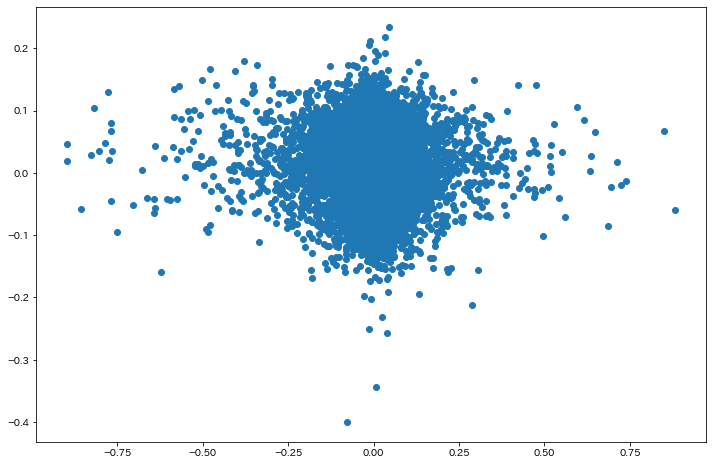

In [109]:
fig = plt.figure(figsize=(12, 8)) #...1
plt.scatter(achieve,f_list_all)
plt.show()

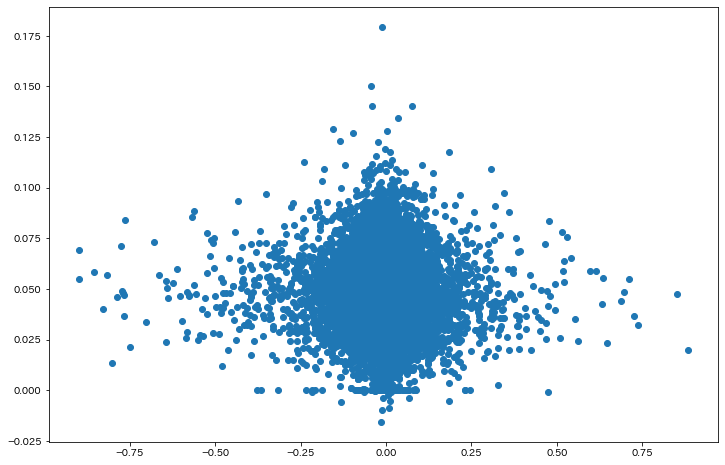

In [110]:
fig = plt.figure(figsize=(12, 8)) #...1
plt.scatter(achieve,j_list_all)
plt.show()

In [30]:
achieve_list=[]
f_list=[]
j_list=[]
a=0
for i,company in tqdm.tqdm(enumerate(company_list.index)):
    #print(i)
    #if i==10:
   #     break
    df_path= '../data/new2/df_achieve/this/{}.csv'.format(company)
    df=pd.read_csv(df_path,index_col=0)   
    achieve_list=[]
    f_list=[]
    j_list=[]
    a=float(0)
    for i in range(0,len(df)):
        if not "訂正" in df["title"][i] and  not "四半期" in df["title"][i] and df["achieve"][i]!="None":
            if float(df["achieve"][i])>1:
                print(company)
                break
            
            a=float(df["achieve"][i])
            achieve_list.append(a)
            f_list.append(float(df["f_score"][i]))
            j_list.append(float(df["j_score"][i]))
  
    if len(achieve_list)>1:
        achieve_list=achieve_list[1:]
        f_list=f_list[:-1]
        j_list=j_list[:-1]
       
    #print(achieve_list)
    #continue
    fig = plt.figure(figsize=(12, 16)) #...1
    plt.subplot(2,1,1)#(行，列，何番目)
    plt.title("企業コード：{},上：日本語極性辞書，下：金融極性辞書".format(str(company)[:4]))
    plt.scatter(achieve,j_list_all,s=10)
    plt.scatter(achieve_list,j_list,s=10)
    plt.xlabel("達成度")
    plt.ylabel("感情値")
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    #状態2
    plt.subplot(2,1, 2)
    plt.scatter(achieve,f_list_all,s=10)
    plt.scatter(achieve_list,f_list,s=10)
    plt.xlabel("達成度")
    plt.ylabel("感情値")
    plt.savefig("../data/image/achieve_score_kimatu/{}.png".format(company))
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    #plt.show()
    plt.close()
    #break

92it [00:18,  4.89it/s]

18790


373it [01:15,  5.12it/s]

29010


388it [01:18,  5.14it/s]

29290
29310


657it [02:13,  5.14it/s]

37500


664it [02:14,  4.99it/s]

37720


666it [02:15,  4.99it/s]

37760


700it [02:21,  5.07it/s]

38560


958it [03:14,  5.06it/s]

45720


2207it [07:43,  4.96it/s]

88360


2512it [08:45,  4.78it/s]


In [ ]:
achieve=achieve[3:]
for i in range(0,3):
    achieve.append(achieve[-1])

# −１のみ

In [69]:
#四半期込み
achieve_m1=[]
f_list_m1=[]
j_list_m1=[]
a=0
for i,company in enumerate(company_m1):
    #if i==10:
   #     break
    df_path= '../data/new2/df_achieve/this/{}.csv'.format(company)
    df=pd.read_csv(df_path,index_col=0)   
    
    for i in range(0,len(df)):
        if not "訂正" in df["title"][i] and  not "四半期" in df["title"][i] and df["achieve"][i]!="None":
            if float(df["achieve"][i])>1:
                print(company)
                break
            
            a=float(df["achieve"][i])
            achieve_m1.append(a)
            f_list_m1.append(float(df["f_score"][i]))
            j_list_m1.append(float(df["j_score"][i]))
            
            #date.append(df.index[i])
        elif not "訂正" in df["title"][i] and "四半期" in df["title"][i] and df["achieve"][i]!="None":
            achieve_m1.append(a)
            f_list_m1.append(float(df["f_score"][i]))
            j_list_m1.append(float(df["j_score"][i]))
    
    achieve_m1=achieve_m1[3:]
    for i in range(0,3):
        achieve_m1.append(achieve_m1[-1])

In [70]:
len(achieve_m1)
len(j_list_m1)

4969

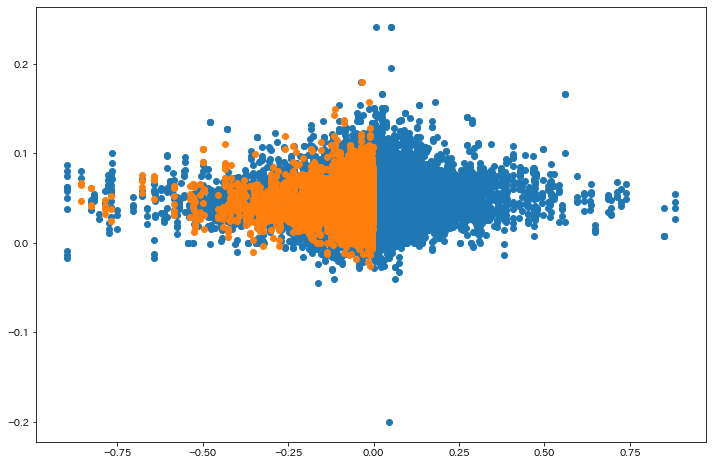

In [71]:
fig = plt.figure(figsize=(12, 8)) #...1
plt.scatter(achieve,j_list_all)
plt.scatter(achieve_m1,j_list_m1)
plt.savefig("image/achieve_tassei_J_1.png")
plt.show()

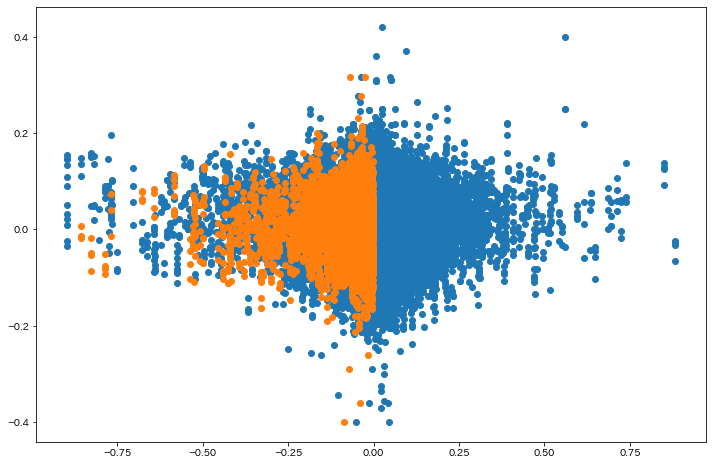

In [72]:
fig = plt.figure(figsize=(12, 8)) #...1
plt.scatter(achieve,f_list_all)
plt.scatter(achieve_m1,f_list_m1)
plt.savefig("image/achieve_tassei_F_1.png")
plt.show()

In [64]:
#四半期込み
achieve_p1=[]
f_list_p1=[]
j_list_p1=[]
a=0
for i,company in enumerate(company_p1):
    #if i==10:
   #     break
    df_path= '../data/new2/df_achieve/this/{}.csv'.format(company)
    df=pd.read_csv(df_path,index_col=0)   
    
    for i in range(0,len(df)):
        if not "訂正" in df["title"][i] and  not "四半期" in df["title"][i] and df["achieve"][i]!="None":
            if float(df["achieve"][i])>1:
                print(company)
                break
            
            a=float(df["achieve"][i])
            achieve_p1.append(a)
            f_list_p1.append(float(df["f_score"][i]))
            j_list_p1.append(float(df["j_score"][i]))
            
            #date.append(df.index[i])
        elif not "訂正" in df["title"][i] and "四半期" in df["title"][i] and df["achieve"][i]!="None":
            achieve_p1.append(a)
            f_list_p1.append(float(df["f_score"][i]))
            j_list_p1.append(float(df["j_score"][i]))
            
    achieve_p1=achieve_p1[3:]
    for i in range(0,3):
        achieve_p1.append(achieve_p1[-1])

29290


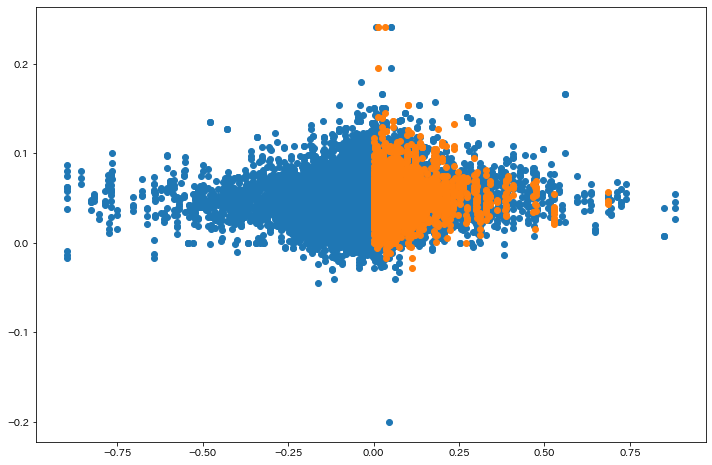

In [65]:
fig = plt.figure(figsize=(12, 8)) #...1
plt.scatter(achieve,j_list_all)
plt.scatter(achieve_p1,j_list_p1)
plt.savefig("image/achieve_tassei_J1.png")
plt.show()

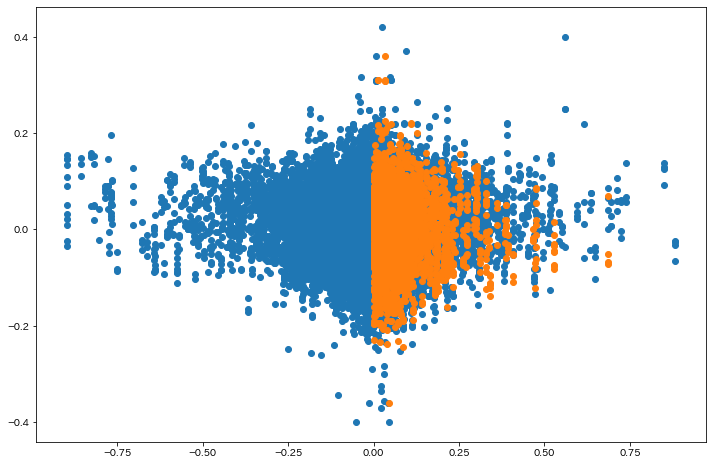

In [66]:
fig = plt.figure(figsize=(12, 8)) #...1
plt.scatter(achieve,f_list_all)
plt.scatter(achieve_p1,f_list_p1)
plt.savefig("image/achieve_tassei_F1.png")
plt.show()

In [84]:
#四半期なし
achieve=[]
f_list_all=[]
j_list_all=[]
a=0
for i,company in enumerate(company_list.index):
    #if i==10:
   #     break
    df_path= '../data/new2/df_achieve/this/{}.csv'.format(company)
    df=pd.read_csv(df_path,index_col=0)   
    
    for i in range(0,len(df)):
        if not "訂正" in df["title"][i] and  not "四半期" in df["title"][i] and df["achieve"][i]!="None":
            if float(df["achieve"][i])>1:
                print(company)
                break
            
            a=float(df["achieve"][i])
            achieve.append(a)
            f_list_all.append(float(df["f_score"][i]))
            j_list_all.append(float(df["j_score"][i]))
            
achieve=achieve[1:]
f_list_all=f_list_all[:-1]
j_list_all=j_list_all[:-1]

18790
29010
29290
29310
37500
37720
37760
38560
45720
88360


In [61]:
#四半期なし
achieve_m1=[]
f_list_m1=[]
j_list_m1=[]
a=0
for i,company in enumerate(company_m1):
    #if i==10:
   #     break
    df_path= '../data/new2/df_achieve/this/{}.csv'.format(company)
    df=pd.read_csv(df_path,index_col=0)   
    
    for i in range(0,len(df)):
        if not "訂正" in df["title"][i] and  not "四半期" in df["title"][i] and df["achieve"][i]!="None":
            if float(df["achieve"][i])>1:
                print(company)
                break
            
            a=float(df["achieve"][i])
            achieve_m1.append(a)
            f_list_m1.append(float(df["f_score"][i]))
            j_list_m1.append(float(df["j_score"][i]))
            
achieve_m1=achieve_m1[1:]
f_list_m1=f_list_m1[:-1]
j_list_m1=j_list_m1[:-1]

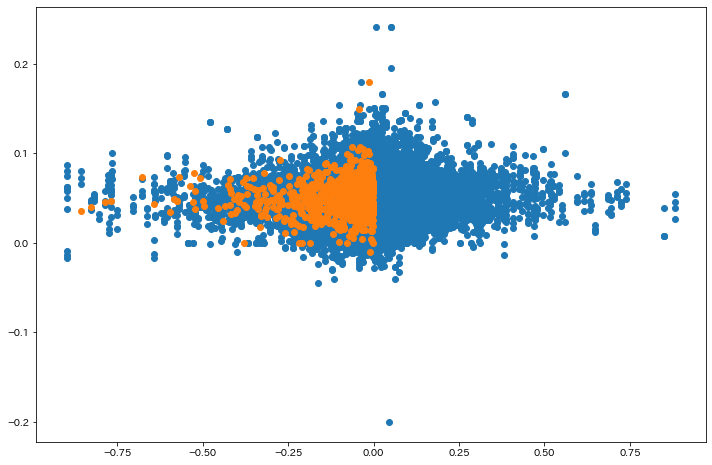

In [62]:
#print(np.corrcoef(achieve_m1,j_list_m1))
fig = plt.figure(figsize=(12, 8)) #...1
plt.scatter(achieve,j_list_all)
plt.scatter(achieve_m1,j_list_m1)
plt.show()

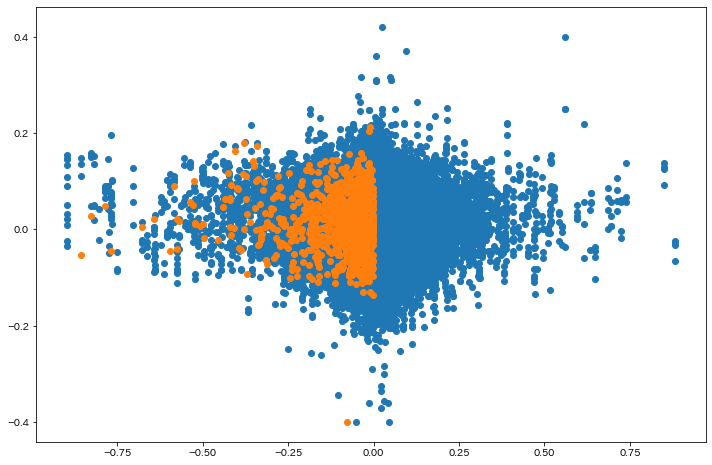

In [63]:
#print(np.corrcoef(achieve_m1,f_list_m1))
fig = plt.figure(figsize=(12, 8)) #...1
plt.scatter(achieve,f_list_all)
plt.scatter(achieve_m1,f_list_m1)
plt.show()

In [93]:
#四半期なし
achieve_m1=[]
f_list_m1=[]
j_list_m1=[]
a=0
for i,company in enumerate(company_p1):
    #if i==10:
   #     break
    df_path= '../data/new2/df_achieve/this/{}.csv'.format(company)
    df=pd.read_csv(df_path,index_col=0)   
    
    for i in range(0,len(df)):
        if not "訂正" in df["title"][i] and  not "四半期" in df["title"][i] and df["achieve"][i]!="None":
            if float(df["achieve"][i])>1:
                print(company)
                break
            
            a=float(df["achieve"][i])
            achieve_m1.append(a)
            f_list_m1.append(float(df["f_score"][i]))
            j_list_m1.append(float(df["j_score"][i]))
            
achieve_m1=achieve_m1[1:]
f_list_m1=f_list_m1[:-1]
j_list_m1=j_list_m1[:-1]

29290


[[ 1.         -0.03969231]
 [-0.03969231  1.        ]]


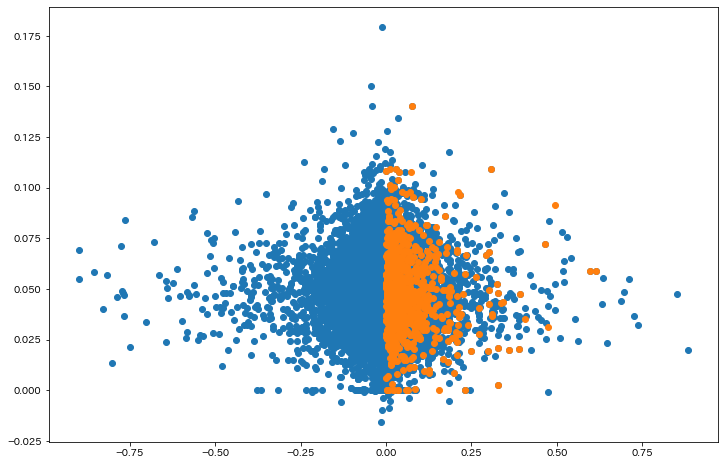

In [100]:
print(np.corrcoef(achieve_m1,j_list_m1))
fig = plt.figure(figsize=(12, 8)) #...1
plt.scatter(achieve,j_list_all)
plt.scatter(achieve_m1,j_list_m1)
plt.show()

[[1.         0.00429026]
 [0.00429026 1.        ]]


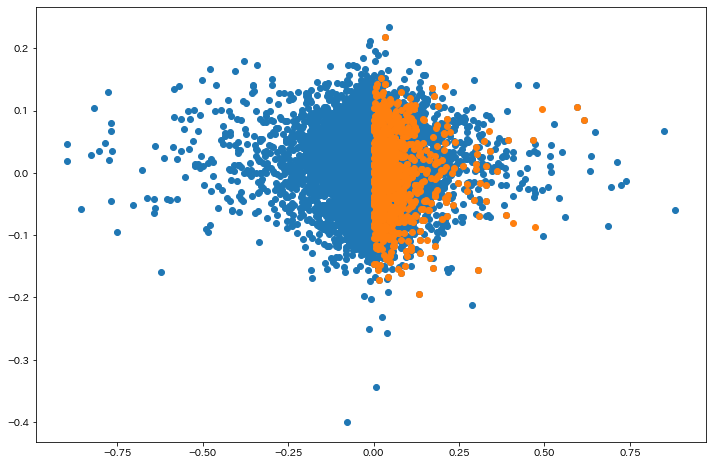

In [99]:
print(np.corrcoef(achieve_m1,f_list_m1))
fig = plt.figure(figsize=(12, 8)) #...1
plt.scatter(achieve,f_list_all)
plt.scatter(achieve_m1,f_list_m1)
plt.show()

In [28]:
#感情値の企業平均の分布

In [31]:
#四半期込み
achieve=[]
f_list_all=[]
j_list_all=[]
a=0
for i,company in enumerate(company_list.index):
    #if i==10:
   #     break
    df_path= '../data/new2/df_achieve/this/{}.csv'.format(company)
    df=pd.read_csv(df_path,index_col=0)   
    f_list=[]
    j_list=[]
    for i in range(0,len(df)):
        if not "訂正" in df["title"][i] and  not "四半期" in df["title"][i] and df["achieve"][i]!="None":
            if float(df["achieve"][i])>1:
                print(company)
                break
            
            a=float(df["achieve"][i])
            achieve.append(a)
            f_list.append(float(df["f_score"][i]))
            j_list.append(float(df["j_score"][i]))
            
            #date.append(df.index[i])
        elif not "訂正" in df["title"][i] and "四半期" in df["title"][i] and df["achieve"][i]!="None":
            achieve.append(a)
            f_list.append(float(df["f_score"][i]))
            j_list.append(float(df["j_score"][i]))
            #date_jf.append(df.index[i])
    if f_list!=[]:
        f_list_all.append(mean(f_list))
        j_list_all.append(mean(j_list))

18790
29010
29290
29310
37500
37720
37760
38560
45720
88360


In [30]:
f_list

[]

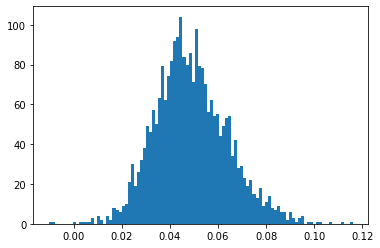

In [33]:
plt.hist(j_list_all, bins=100)
plt.savefig("image/j_hist.png")
plt.show()

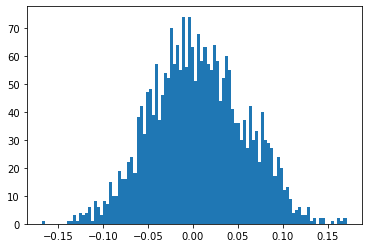

In [34]:
plt.hist(f_list_all, bins=100)
plt.savefig("image/f_hist.png")
plt.show()

# memo

In [45]:
df_path= '../data/new2/df_achieve/this/{}.csv'.format(company)
df=pd.read_csv(df_path,index_col=0)   
achieve_list=[]
f_list=[]
j_list=[]
a=float(0)
for i in range(0,len(df)):
    if not "訂正" in df["title"][i] and  not "四半期" in df["title"][i] and df["achieve"][i]!="None":
        if float(df["achieve"][i])>1:
            print(company)
            break

        a=float(df["achieve"][i])
        achieve_list.append(a)
        f_list.append(float(df["f_score"][i]))
        j_list.append(float(df["j_score"][i]))

        #date.append(df.index[i])
    elif not "訂正" in df["title"][i] and "四半期" in df["title"][i] and df["achieve"][i]!="None":
        achieve_list.append(a)
        f_list.append(float(df["f_score"][i]))
        j_list.append(float(df["j_score"][i]))

In [46]:
achieve_list

[0.0, 0.0, 0.0]

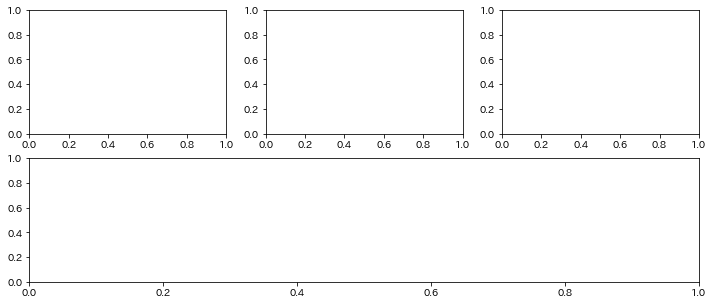

In [277]:

fig = plt.figure(figsize=(12, 5))

ax_1 = fig.add_subplot(2, 3, 1)
ax_2 = fig.add_subplot(2, 3, 2)
ax_3 = fig.add_subplot(2, 3, 3)
ax_4= fig.add_subplot(2, 3, (4, 6)) # ２行目の１～３列分グラフを作成

plt.show()

In [286]:
fig = plt.figure(figsize=(12, 16)) #...1
plt.subplot(2,1,1)#(行，列，何番目)
plt.title("企業コード：{},上：日本語極性辞書，下：金融極性辞書".format(str(company)[:4]))
plt.scatter(achieve,j_list_all,s=10)
plt.scatter(achieve_list,j_list,s=10)
plt.xlabel("達成度")
plt.ylabel("感情値")
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#状態2
plt.subplot(2,1, 2)
plt.scatter(achieve,f_list_all,s=10)
plt.scatter(achieve_list,f_list,s=10)
plt.xlabel("達成度")
plt.ylabel("感情値")
plt.savefig("../data/image/{}.png".format(company))
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.show()
plt.close()

In [13]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import IPython.display as display
from PIL import Image
%matplotlib inline 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [8]:
img = Image.open('../data/image/13010.png', 'r')

In [4]:
print('', end='')
print('test2', end='')

test1test2

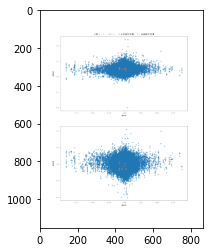

In [14]:
img = mpimg.imread('../data/image/13010.png', 'r')
imgplot = plt.imshow(img)
plt.show()

In [35]:
achieve_list=[]
f_list=[]
j_list=[]
a=0
for i,company in enumerate(company_list.index):
    #print(i)
    #if i==10:
   #     break
    df_path= '../data/new2/df_achieve/this/{}.csv'.format(company)
    df=pd.read_csv(df_path,index_col=0)   
    #achieve=[]
    f_list=[]
    j_list=[]
    for i in range(0,len(df)):
        if not "訂正" in df["title"][i] and  not "四半期" in df["title"][i] and df["achieve"][i]!="None":
            if float(df["achieve"][i])>1:
                print(company)
                break
            
            a=float(df["achieve"][i])
            achieve_list.append(a)
            f_list.append(float(df["f_score"][i]))
            j_list.append(float(df["j_score"][i]))
            
            #date.append(df.index[i])
        elif not "訂正" in df["title"][i] and "四半期" in df["title"][i] and df["achieve"][i]!="None":
            achieve_list.append(a)
            f_list.append(float(df["f_score"][i]))
            j_list.append(float(df["j_score"][i]))
          
        #date_jf.append(df.index[i])
    #plt.scatter(achieve,j_list)
    #plt.scatter(achieve,f_list)
    #lt.savefig("../data/image/{}_F_achieve.png".format(company))
    #plt.show()
    #break

18790
29010
29290
29310
37500
37720
37760
38560
45720
88360


In [25]:
zisseki=1000
yosoku=1200

In [26]:
(yosoku-zisseki)/zisseki

0.2

In [27]:
(yosoku-zisseki)/yosoku

0.16666666666666666

In [12]:
import random
random.random()

0.16502520718062808

In [13]:
rand=0
com_all=[]
#2512企業 それぞれ五回コイン投げの試行
for i in range(0,2512):
    com=[]
    rand1=random.random()
    if rand1>0.5:
        cnt=5
    else:
        cnt=4
            
    for j in range(0,cnt):
        rand=random.random()
        if rand>0.5:
            com.append(1)
        else:
            com.append(-1)

    com_all.append(sum(com)/5)

In [14]:
com_all

[0.0,
 -0.2,
 0.4,
 -1.0,
 0.4,
 0.0,
 -0.2,
 0.0,
 0.2,
 0.6,
 -0.6,
 0.2,
 -0.4,
 -0.2,
 0.6,
 0.4,
 0.6,
 0.4,
 0.6,
 0.4,
 0.0,
 0.4,
 0.2,
 -0.6,
 0.2,
 -0.4,
 0.4,
 -0.4,
 0.2,
 -0.6,
 0.0,
 0.6,
 -0.4,
 0.4,
 -0.6,
 0.4,
 0.8,
 0.0,
 0.0,
 -1.0,
 0.4,
 -1.0,
 -0.6,
 0.4,
 0.2,
 0.0,
 0.0,
 0.2,
 -0.4,
 0.4,
 -0.6,
 0.4,
 0.2,
 0.0,
 0.6,
 -0.4,
 -0.4,
 0.0,
 0.0,
 -0.4,
 0.2,
 0.8,
 0.0,
 0.4,
 0.2,
 -0.2,
 0.2,
 0.0,
 -0.2,
 0.0,
 -0.4,
 -0.4,
 -0.4,
 -0.4,
 -0.2,
 -0.4,
 -0.2,
 -0.6,
 0.4,
 0.4,
 0.6,
 -0.6,
 0.2,
 0.6,
 0.8,
 0.2,
 -1.0,
 -0.2,
 0.2,
 0.6,
 0.0,
 -0.6,
 0.6,
 -0.2,
 -0.2,
 0.2,
 0.2,
 0.0,
 -0.8,
 -0.4,
 -0.2,
 -0.2,
 1.0,
 0.4,
 0.0,
 0.2,
 -0.4,
 -1.0,
 0.0,
 0.2,
 0.6,
 0.2,
 -0.2,
 0.2,
 0.4,
 0.2,
 -0.4,
 -0.4,
 -0.4,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 -0.4,
 0.6,
 0.0,
 -0.2,
 0.4,
 0.6,
 -0.2,
 -0.4,
 0.2,
 0.0,
 0.0,
 0.0,
 -0.2,
 -0.2,
 0.8,
 -0.6,
 1.0,
 -0.4,
 0.2,
 0.6,
 -0.4,
 -0.6,
 0.0,
 0.2,
 -0.2,
 -1.0,
 -0.2,
 0.0,
 -0.2,
 -0.2,
 -0.4,
 -0.4,
 

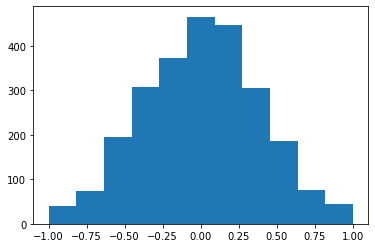

In [15]:
plt.hist(com_all, bins=11)
#plt.savefig("image/rand_hist.png")
plt.show()

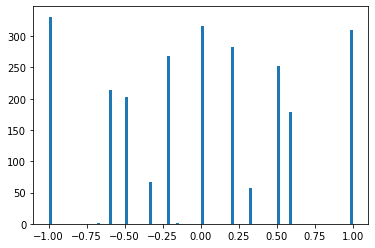

In [16]:
plt.hist(tassei_list, bins=100)
#plt.savefig("image/achieve_per.png")
plt.show()

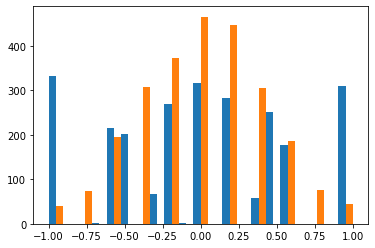

In [24]:
plt.hist([tassei_list,com_all],bins=21,rwidth=5)
plt.show()

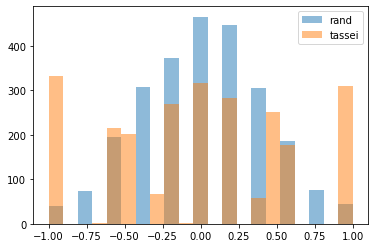

In [30]:
plt.hist(com_all, bins=21,alpha=0.5,label="rand")
plt.hist(tassei_list, bins=21,alpha=0.5,label="tassei")
plt.legend()
plt.show()

## 達成度を修正

In [42]:
#四半期込み
achieve_m1=[]
f_list_m1=[]
j_list_m1=[]
a=0
for i,company in enumerate(company_m1):
    #if i==10:
   #     break
    df_path= '../data/new2/df_achieve/this/{}.csv'.format(company)
    df=pd.read_csv(df_path,index_col=0)   
    
    for i in range(0,len(df)):
        if not "訂正" in df["title"][i] and  not "四半期" in df["title"][i] and df["achieve"][i]!="None":
            if float(df["achieve"][i])>1:
                print(company)
                break
            
            a=float(df["achieve"][i])
            achieve_m1.append(a)
            f_list_m1.append(float(df["f_score"][i]))
            j_list_m1.append(float(df["j_score"][i]))
            
            #date.append(df.index[i])
        elif not "訂正" in df["title"][i] and "四半期" in df["title"][i] and df["achieve"][i]!="None":
            achieve_m1.append(a)
            f_list_m1.append(float(df["f_score"][i]))
            j_list_m1.append(float(df["j_score"][i]))
    
    achieve_m1=achieve_m1[3:]
    f_list_m1=f_list_m1[3:]
    j_list_m1=j_list_m1[3:]
    #for i in range(0,3):
        #achieve_m1.append(achieve_m1[-1])

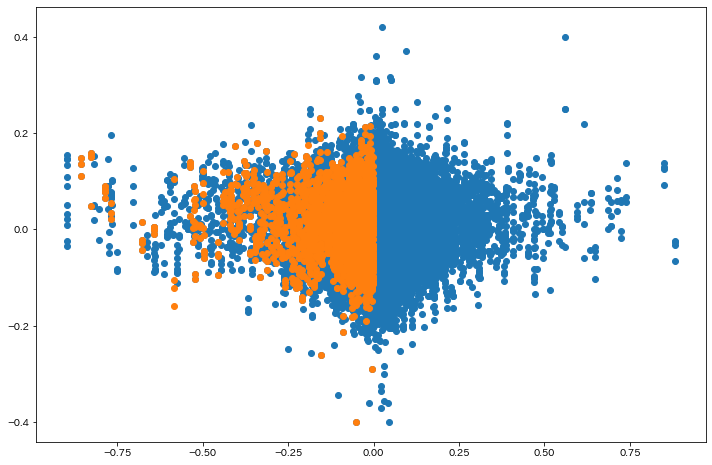

In [46]:
#print(np.corrcoef(achieve_m1,j_list_m1))
fig = plt.figure(figsize=(12, 8)) #...1
plt.scatter(achieve,f_list_all)
plt.scatter(achieve_m1,f_list_m1)
plt.show()

In [52]:
np.corrcoef([achieve_p1,f_list_p1])

array([[1.        , 0.05986529],
       [0.05986529, 1.        ]])

In [53]:
np.corrcoef([achieve_p1,j_list_p1])

array([[1.        , 0.03502277],
       [0.03502277, 1.        ]])

In [75]:
np.corrcoef([achieve_p1,f_list_p1])

array([[ 1.        , -0.00211953],
       [-0.00211953,  1.        ]])

In [76]:
np.corrcoef([achieve_p1,j_list_p1])

array([[1.        , 0.04790015],
       [0.04790015, 1.        ]])

In [54]:
#四半期込み
achieve_m1=[]
f_list_m1=[]
j_list_m1=[]
a=0
for i,company in enumerate(company_m1):
    #if i==10:
   #     break
    df_path= '../data/new2/df_achieve/this/{}.csv'.format(company)
    df=pd.read_csv(df_path,index_col=0)   
    
    for i in range(0,len(df)):
        if not "訂正" in df["title"][i] and  not "四半期" in df["title"][i] and df["achieve"][i]!="None":
            if float(df["achieve"][i])>1:
                print(company)
                break
            
            a=float(df["achieve"][i])
            achieve_m1.append(a)
            f_list_m1.append(float(df["f_score"][i]))
            j_list_m1.append(float(df["j_score"][i]))
            
            #date.append(df.index[i])
        elif not "訂正" in df["title"][i] and "四半期" in df["title"][i] and df["achieve"][i]!="None":
            achieve_m1.append(a)
            f_list_m1.append(float(df["f_score"][i]))
            j_list_m1.append(float(df["j_score"][i]))
    
    achieve_m1=achieve_m1[3:]
    f_list_m1=f_list_m1[3:]
    j_list_m1=j_list_m1[3:]
    #for i in range(0,3):
        #achieve_m1.append(achieve_m1[-1])

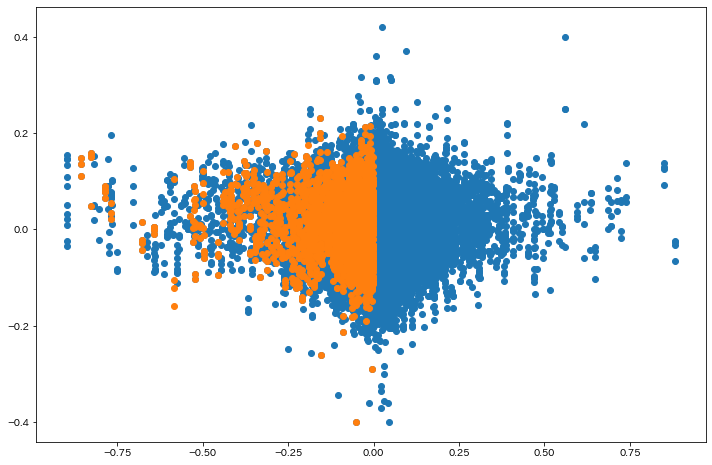

In [57]:
#print(np.corrcoef(achieve_m1,j_list_m1))
fig = plt.figure(figsize=(12, 8)) #...1
plt.scatter(achieve,f_list_all)
plt.scatter(achieve_m1,f_list_m1)
plt.show()

In [13]:
len(f_list_all)

41320

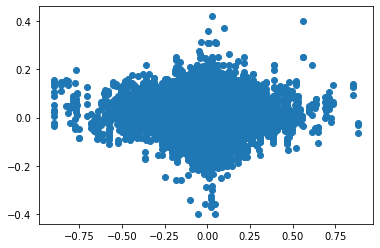

In [14]:
plt.scatter(achieve,f_list_all)

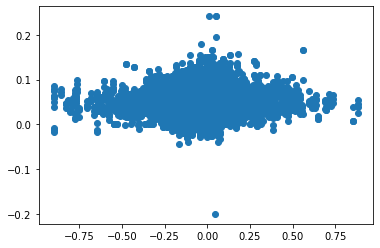

In [15]:
plt.scatter(achieve,j_list_all)

0it [00:00, ?it/s]

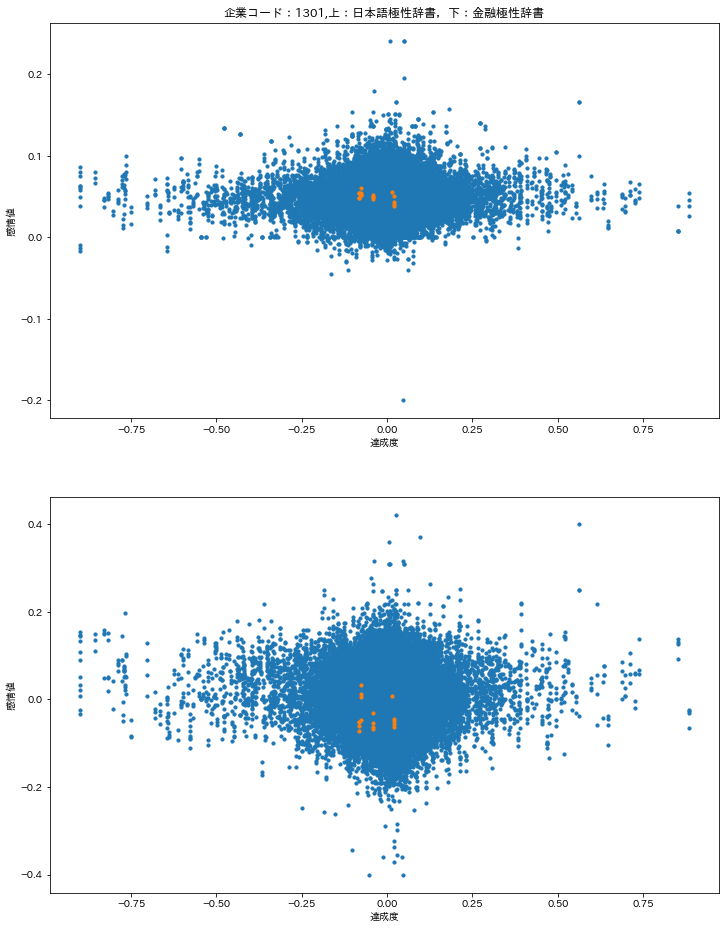

0it [00:00, ?it/s]


In [34]:
achieve_list=[]
f_list=[]
j_list=[]
a=0
for i,company in tqdm.tqdm(enumerate(company_list.index)):
    #print(i)
    #if i==10:
   #     break
    df_path= '../data/new2/df_achieve/this/{}.csv'.format(company)
    df=pd.read_csv(df_path,index_col=0)   
    achieve_list=[]
    f_list=[]
    j_list=[]
    a=float(0)
    for i in range(0,len(df)):
        if not "訂正" in df["title"][i] and  not "四半期" in df["title"][i] and df["achieve"][i]!="None":
            if float(df["achieve"][i])>1:
                print(company)
                break
            
            a=float(df["achieve"][i])
            achieve_list.append(a)
            f_list.append(float(df["f_score"][i]))
            j_list.append(float(df["j_score"][i]))
            
            #date.append(df.index[i])
        elif not "訂正" in df["title"][i] and "四半期" in df["title"][i] and df["achieve"][i]!="None":
            achieve_list.append(a)
            f_list.append(float(df["f_score"][i]))
            j_list.append(float(df["j_score"][i]))
    
    if len(achieve_list)>3:
        achieve_list=achieve_list[3:]
        f_list=f_list[3:]
        j_list=j_list[3:]
        #if achieve_list!=[]:
            #for i in range(0,3):
          #      achieve_list.append(achieve_list[-1])
    #print(achieve_list)
    #continue
    fig = plt.figure(figsize=(12, 16)) #...1
    plt.subplot(2,1,1)#(行，列，何番目)
    plt.title("企業コード：{},上：日本語極性辞書，下：金融極性辞書".format(str(company)[:4]))
    plt.scatter(achieve,j_list_all,s=10)
    plt.scatter(achieve_list,j_list,s=10)
    plt.xlabel("達成度")
    plt.ylabel("感情値")
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    #状態2
    plt.subplot(2,1, 2)
    plt.scatter(achieve,f_list_all,s=10)
    plt.scatter(achieve_list,f_list,s=10)
    plt.xlabel("達成度")
    plt.ylabel("感情値")
    #plt.savefig("../data/image/achieve_score/{}.png".format(company))
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    #plt.close()
    break

In [35]:
f_list

[-0.0622347949080622,
 -0.0450070323488045,
 -0.0481927710843373,
 -0.0562347188264058,
 -0.0669614655716993,
 -0.062251655629139,
 -0.030750307503075,
 -0.0543046357615894,
 -0.0725423728813559,
 -0.0607287449392712,
 -0.0507425742574257,
 -0.0512820512820512,
 -0.0468058191018342,
 0.033605812897366,
 0.0055147058823529,
 0.0118721461187214,
 0.0085427135678391]

In [31]:
(achieve_list)

[0.019132,
 0.019132,
 0.019132,
 0.019132,
 -0.0406329588014981,
 -0.0406329588014981,
 -0.0406329588014981,
 -0.0406329588014981,
 -0.0821013986013986,
 -0.0821013986013986,
 -0.0821013986013986,
 -0.0821013986013986,
 -0.0770481481481481,
 -0.0770481481481481,
 -0.0770481481481481,
 -0.0770481481481481,
 0.0143,
 0.0143,
 0.0143,
 0.0143]

In [33]:
achieve_list

[0.0,
 0.0,
 0.0,
 0.019132,
 0.019132,
 0.019132,
 0.019132,
 -0.0406329588014981,
 -0.0406329588014981,
 -0.0406329588014981,
 -0.0406329588014981,
 -0.0821013986013986,
 -0.0821013986013986,
 -0.0821013986013986,
 -0.0821013986013986,
 -0.0770481481481481,
 -0.0770481481481481,
 -0.0770481481481481,
 -0.0770481481481481,
 0.0143]